In [ ]:
import import_ipynb
%run 03-EDA.ipynb

### Imports

In [2]:
import math
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import make_scorer


import statsmodels.api as sm

<a id="5"></a>
# <div style="padding:20px;color:white;margin:0;color:darkgreen;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#f2ffe6;overflow:hidden">5. | Model Development: CDC Data: Logistic Regression</div>

### Selected Features

In [3]:
selected_features_cdc_data = ['HighBP', 'HighChol', 'BMI', 'PhysActivity', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',  'Age', 'Education' ,'Income','Stroke','HeartDiseaseorAttack']


<a id="5.1"></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#E0FFFF;overflow:hidden">5.1 | Model Development: CDC Data: Logistic Regression: First Iteration</div>

### Split Features and Target

In [4]:
X = cdc_data[selected_features_cdc_data]
y = cdc_data['Diabetes_binary']

### Split Train and Test Dataset

In [8]:
X_train,X_test,y_train,y_test=  train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(202944, 13) (202944,)
(50736, 13) (50736,)


#### Train with Logistic Regression

In [9]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

#### Predict using Logistic Regression

In [10]:

predictions_train_lr = model_lr.predict(X_train)
predictions_test_lr  = model_lr.predict(X_test)

#### LR: Significant Variables

In [11]:
# Coefficients from scikit-learn
print("Coefficients from scikit-learn:")
print(model_lr.coef_)

# Using statsmodels to get p-values and more detailed summary
X_train_sm = sm.add_constant(X_train)  # Add constant for intercept
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Summary of the logistic regression model
print(result.summary())

Coefficients from scikit-learn:
[[ 0.7414591   0.59268305  0.06198663  0.01783346  0.53994986 -0.00521078
  -0.00707872  0.11668388  0.12067537 -0.04243371 -0.04252456  0.19867094
   0.38911032]]
Optimization terminated successfully.
         Current function value: 0.323301
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:               202944
Model:                          Logit   Df Residuals:                   202930
Method:                           MLE   Df Model:                           13
Date:                Wed, 04 Dec 2024   Pseudo R-squ.:                  0.2005
Time:                        20:51:01   Log-Likelihood:                -65612.
converged:                       True   LL-Null:                       -82070.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      

#### Coefficients and Interpretation:
 
Coefficients:
Positive Coefficients: Indicate that as the predictor increases, the log odds of the target (Diabetes_binary) being 1 (i.e., having diabetes) also increases.

Negative Coefficients: Indicate that as the predictor increases, the log odds of the target being 1 decreases.

Significant Predictors:

All predictors have a p-value (P>|z|) less than 0.05, indicating they are statistically significant.

Key Predictors:

HighBP (0.7865): Having high blood pressure is strongly associated with increased odds of diabetes, as indicated by the high positive coefficient.
HighChol (0.5925): High cholesterol is also associated with increased odds of diabetes.
GenHlth (0.5602): Poor general health significantly increases the odds of diabetes.
Age (0.1312): Older age is associated with higher odds of diabetes.
DiffWalk (0.1471): Difficulty walking is positively associated with diabetes.

Negative Predictors:

PhysActivity (-0.0356): Physical activity slightly reduces the odds of diabetes.
MentHlth (-0.0052): Better mental health reduces the odds, though the effect is small.
PhysHlth (-0.0067): Better physical health reduces the odds of diabetes.
Education (-0.0337): Higher education levels are associated with reduced odds of diabetes.
Income (-0.0433): Higher income levels are also associated with reduced odds of diabetes.
 
Model Statistics:
 
Log-Likelihood (-65745):
The log-likelihood value is used to assess model fit; higher values (closer to zero) indicate a better fit.

Pseudo R-squared (0.1989):
Indicates the proportion of variance explained by the model. While not directly comparable to R-squared in linear regression, a higher value suggests better explanatory power.

LLR p-value (0.000):
Indicates that the model is statistically significant overall.

Convergence:
The output indicates that the model converged successfully, meaning the optimization process found a solution.
 
Confidence Intervals:
 
Confidence Intervals:

Provide a range within which the true coefficient is expected to fall with 95% confidence.
For example, the coefficient for HighBP (0.7865) has a 95% confidence interval of [0.755, 0.819], indicating that the effect is consistently positive.
 
Overall Interpretation:
 
Influential Factors: High blood pressure, high cholesterol, poor general health, and age are significant predictors of diabetes risk, with high blood pressure having the strongest association.

Protective Factors: Physical activity, mental health, education, and income appear to be protective factors, reducing the risk of diabetes.

Model Fit: The model is statistically significant and explains a substantial portion of the variance in the outcome, as indicated by the pseudo R-squared.

#### Plot Confusion Matrix For Logistic Regression

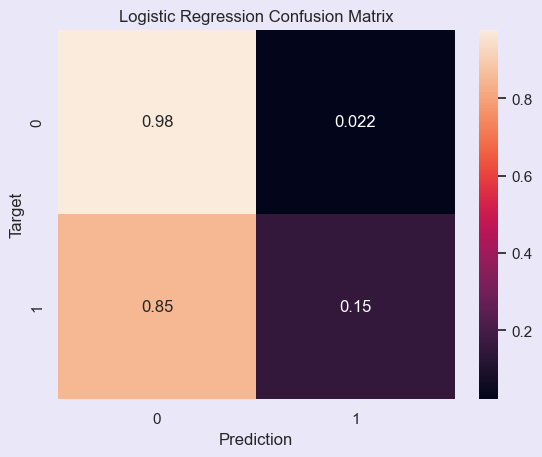

In [12]:
cf_lr = confusion_matrix(y_train, predictions_train_lr, normalize='true')
plt.figure()
sns.heatmap(cf_lr, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('{} Confusion Matrix'.format("Logistic Regression"))
plt.show()

#### Calculate Evaluation Metrics for Logistic Regression

In [13]:
# Training set performance
lr_train_accuracy = accuracy_score(y_train, predictions_train_lr) # Calculate Accuracy
lr_train_f1 = f1_score(y_train, predictions_train_lr) # Calculate F1-score
lr_train_precision = precision_score(y_train, predictions_train_lr) # Calculate Precision
lr_train_recall = recall_score(y_train, predictions_train_lr) # Calculate Recall
lr_train_rocauc_score = roc_auc_score(y_train, predictions_train_lr)
lr_train_log_loss_value = log_loss(y_train, predictions_train_lr)


# Test set performance
lr_test_accuracy = accuracy_score(y_test, predictions_test_lr) # Calculate Accuracy
lr_test_f1 = f1_score(y_test, predictions_test_lr) # Calculate F1-score
lr_test_precision = precision_score(y_test, predictions_test_lr) # Calculate Precision
lr_test_recall = recall_score(y_test, predictions_test_lr) # Calculate Recall
lr_test_rocauc_score = roc_auc_score(y_test, predictions_test_lr) #Calculate Roc
lr_test_log_loss_value = log_loss(y_test, predictions_test_lr)

print('LR: Model performance for Training set')
print("- Accuracy: {:.4f}".format(lr_train_accuracy))
print('- F1 score: {:.4f}'.format(lr_train_f1))
print('- Precision: {:.4f}'.format(lr_train_precision))
print('- Recall: {:.4f}'.format(lr_train_recall))
print('- Roc Auc Score: {:.4f}'.format(lr_train_rocauc_score))
print('- Log Loss: {:.4f}'.format(lr_train_log_loss_value))

    
    
print('----------------------------------')
    
print('LR: Model performance for Test set')
print('- Accuracy: {:.4f}'.format(lr_test_accuracy))
print('- F1 score: {:.4f}'.format(lr_test_f1))
print('- Precision: {:.4f}'.format(lr_test_precision))
print('- Recall: {:.4f}'.format(lr_test_recall))
print('- Roc Auc Score: {:.4f}'.format(lr_test_rocauc_score))
print('- Log Loss: {:.4f}'.format(lr_test_log_loss_value))

    
print('='*35)
print('\n')

LR: Model performance for Training set
- Accuracy: 0.8625
- F1 score: 0.2345
- Precision: 0.5278
- Recall: 0.1508
- Roc Auc Score: 0.5644
- Log Loss: 4.9548
----------------------------------
LR: Model performance for Test set
- Accuracy: 0.8646
- F1 score: 0.2433
- Precision: 0.5308
- Recall: 0.1578
- Roc Auc Score: 0.5677
- Log Loss: 4.8798




#### LR: MSE and RMSE


In [14]:
mse_lr = mean_squared_error(y_test,predictions_test_lr)
print('mse_lr:'+str(mse_lr))
rmse_lr = math.sqrt(mean_squared_error(y_test,predictions_test_lr))
print('rmse_lr:'+str(rmse_lr))

mse_lr:0.13538710186061179
rmse_lr:0.3679498632430943


#### LR: Classification Report


In [15]:
cm_lr_train = classification_report(y_train,predictions_train_lr)

print('Logistic Regression Model: Train\n')
print(cm_lr_train)

cm_lr_test = classification_report(y_test,predictions_test_lr)

print('Logistic Regression Model: Test\n')
print(cm_lr_test)

Logistic Regression Model: Train

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.92    174595
         1.0       0.53      0.15      0.23     28349

    accuracy                           0.86    202944
   macro avg       0.70      0.56      0.58    202944
weighted avg       0.83      0.86      0.83    202944

Logistic Regression Model: Test

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     43739
         1.0       0.53      0.16      0.24      6997

    accuracy                           0.86     50736
   macro avg       0.70      0.57      0.58     50736
weighted avg       0.83      0.86      0.83     50736



#### LR: N-fold cross-validation

In [8]:
n_splits = 5

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

X = cdc_data[selected_features_cdc_data]
y = cdc_data['Diabetes_binary']

model_lr = LogisticRegression()

# Arrays to store accuracy scores
training_accuracies = []
testing_accuracies = []

# Arrays to store f1 scores
training_f1 = []
testing_f1 = []

# Arrays to store Precision scores
training_precision = []
testing_precision = []

# Arrays to store Recall scores
training_recall = []
testing_recall = []

# Arrays to store RO-AUC scores
training_rocauc_score = []
testing_rocauc_score = []

# Arrays to store Log Loss scores
training_log_loss_value = []
testing_log_loss_value = []

# Perform cross-validation
for train_index, test_index in skf.split(X, y):
    # Split the data into training and test sets for this fold
    X_train_kfold, X_test_kfold = X.iloc[train_index], X.iloc[test_index]
    y_train_kfold, y_test_kfold = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    model_lr.fit(X_train_kfold, y_train_kfold)
    
    # Predict on training and test data
    pred_train_lr_kfold = model_lr.predict(X_train_kfold)
    pred_test_lr_kfold = model_lr.predict(X_test_kfold)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train_kfold, pred_train_lr_kfold)
    test_accuracy = accuracy_score(y_test_kfold, pred_test_lr_kfold)
    
    # Store the accuracy scores
    training_accuracies.append(train_accuracy)
    testing_accuracies.append(test_accuracy)

    # Calculate f1
    train_f1 = f1_score(y_train_kfold, pred_train_lr_kfold)
    test_f1 = f1_score(y_test_kfold, pred_test_lr_kfold)
    
    # Store the f1 scores
    training_f1.append(train_f1)
    testing_f1.append(test_f1)

    # Calculate Precision
    train_precision_score = precision_score(y_train_kfold, pred_train_lr_kfold)
    test_precision_score = precision_score(y_test_kfold, pred_test_lr_kfold)
    
    # Store the Precision scores
    training_precision.append(train_precision_score)
    testing_precision.append(test_precision_score)

    # Calculate recall
    train_recall_score = recall_score(y_train_kfold, pred_train_lr_kfold)
    test_recall_score = recall_score(y_test_kfold, pred_test_lr_kfold)
    
    # Store the recall scores
    training_recall.append(train_recall_score)
    testing_recall.append(test_recall_score)

    # Calculate RO-AUC
    train_roc_auc_score = roc_auc_score(y_train_kfold, pred_train_lr_kfold)
    test_roc_auc_score = roc_auc_score(y_test_kfold, pred_test_lr_kfold)
    
    # Store the RO-AUC scores
    training_rocauc_score.append(train_roc_auc_score)
    testing_rocauc_score.append(test_roc_auc_score)

    # Calculate Log Loss
    train_log_loss = log_loss(y_train_kfold, pred_train_lr_kfold)
    test_log_loss = log_loss(y_test_kfold, pred_test_lr_kfold)
    
    # Store the Log Loss
    training_log_loss_value.append(train_log_loss)
    testing_log_loss_value.append(test_log_loss)


# Calculate mean and standard deviation of accuracies
mean_train_accuracy_lr_iter1 = np.mean(training_accuracies)
std_train_accuracy_lr_iter1 = np.std(training_accuracies)
mean_test_accuracy_lr_iter1 = np.mean(testing_accuracies)
std_test_accuracy_lr_iter1 = np.std(testing_accuracies)

# Print results
print("\n")
print("="*50)
print(f"Training Accuracy: {mean_train_accuracy_lr_iter1:.2f} ± {std_train_accuracy_lr_iter1:.2f}")
print(f"Test Accuracy: {mean_test_accuracy_lr_iter1:.2f} ± {std_test_accuracy_lr_iter1:.2f}")
print("="*50)

# Calculate mean and standard deviation of f1 scores

mean_train_f1_lr_iter1 = np.mean(training_f1)
std_train_f1_lr_iter1 = np.std(training_f1)
mean_test_f1_lr_iter1 = np.mean(testing_f1)
std_test_f1_lr_iter1 = np.std(testing_f1)

# Print results
print("\n")
print("="*50)
print(f"Training F1: {mean_train_f1_lr_iter1:.2f} ± {std_train_f1_lr_iter1:.2f}")
print(f"Test F1: {mean_test_f1_lr_iter1:.2f} ± {std_test_f1_lr_iter1:.2f}")
print("="*50)

# Calculate mean and standard deviation of Precision scores

mean_train_precision_lr_iter1 = np.mean(training_precision)
std_train_precision_lr_iter1 = np.std(training_precision)
mean_test_precision_lr_iter1 = np.mean(testing_precision)
std_test_precision_lr_iter1 = np.std(testing_precision)

# Print results
print("\n")
print("="*50)
print(f"Training Precision: {mean_train_precision_lr_iter1:.2f} ± {std_train_precision_lr_iter1:.2f}")
print(f"Test Precision: {mean_test_precision_lr_iter1:.2f} ± {std_test_precision_lr_iter1:.2f}")
print("="*50)

# Calculate mean and standard deviation of Recall scores

mean_train_recall_lr_iter1 = np.mean(training_recall)
std_train_recall_lr_iter1 = np.std(training_recall)
mean_test_recall_lr_iter1 = np.mean(testing_recall)
std_test_recall_lr_iter1 = np.std(testing_recall)

# Print results
print("\n")
print("="*50)
print(f"Training Recall: {mean_train_recall_lr_iter1:.2f} ± {std_train_recall_lr_iter1:.2f}")
print(f"Test Recall: {mean_test_recall_lr_iter1:.2f} ± {std_test_recall_lr_iter1:.2f}")
print("="*50)

# Calculate mean and standard deviation of RO-AUC scores

mean_train_rocauc_score_lr_iter1 = np.mean(training_rocauc_score)
std_train_rocauc_score_lr_iter1 = np.std(training_rocauc_score)
mean_test_rocauc_score_lr_iter1 = np.mean(testing_rocauc_score)
std_test_rocauc_score_lr_iter1 = np.std(testing_rocauc_score)

# Print results
print("\n")
print("="*50)
print(f"Training RO-AUC: {mean_train_rocauc_score_lr_iter1:.2f} ± {std_train_rocauc_score_lr_iter1:.2f}")
print(f"Test RO-AUC: {mean_test_rocauc_score_lr_iter1:.2f} ± {std_test_rocauc_score_lr_iter1:.2f}")
print("="*50)

# Calculate mean and standard deviation of Log Loss scores

mean_train_log_loss_value_lr_iter1 = np.mean(training_log_loss_value)
std_train_log_loss_value_lr_iter1 = np.std(training_log_loss_value)
mean_test_log_loss_value_lr_iter1 = np.mean(testing_log_loss_value)
std_test_log_loss_value_lr_iter1 = np.std(testing_log_loss_value)

# Print results
print("\n")
print("="*50)
print(f"Training Log Loss: {mean_train_log_loss_value_lr_iter1:.2f} ± {std_train_log_loss_value_lr_iter1:.2f}")
print(f"Test Log Loss: {mean_test_log_loss_value_lr_iter1:.2f} ± {std_test_log_loss_value_lr_iter1:.2f}")
print("="*50)





Training Accuracy: 0.86 ± 0.00
Test Accuracy: 0.86 ± 0.00


Training F1: 0.23 ± 0.01
Test F1: 0.23 ± 0.01


Training Precision: 0.53 ± 0.00
Test Precision: 0.53 ± 0.01


Training Recall: 0.15 ± 0.01
Test Recall: 0.15 ± 0.01


Training RO-AUC: 0.56 ± 0.00
Test RO-AUC: 0.56 ± 0.00


Training Log Loss: 4.93 ± 0.01
Test Log Loss: 4.94 ± 0.02


<a id="5.1"></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#E0FFFF;overflow:hidden">5.1 | Model Development: CDC Data: Logistic Regression: First Iteration: Conclusions</div>

<div style="background-color:white;font-size:15px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"> <b>Evaluate: Logistic Regression Model</b><br>
Accuracy - 86% <br>
F1 Score - 0.23 <br>
RO-AUC   - 0.56 <br>
Log Loss - 4.94 <br>

<b>Overall Conclusions:</b>
 
Class Imbalance: The disparity between high accuracy and low F1 score, recall, and RO-AUC suggests class imbalance. 
The model is likely biased towards predicting the majority class.

Model Calibration and Discrimination: 
The high Log Loss and low RO-AUC indicate that the model's probability estimates are poorly calibrated and 
it struggles to discriminate between classes.

<b>Need for Improvement: </b>

Focus on improving recall and F1 score by:
Addressing class imbalance through techniques like oversampling the minority class, 

undersampling the majority class, 

or using synthetic data generation (e.g., SMOTE).

Exploring different algorithms or hyperparameters that might better capture the minority class.

Evaluating additional metrics such as the confusion matrix to identify where the model is making errors.

</div>



<a id="5.2"></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#E0FFFF;overflow:hidden">5.2 | Model Development: CDC Data: Logistic Regression: Second Iteration</div>

Model shows overall good performance.

It can be improved by resolving the class imbalance and hyper parameter tuning.

To put through the optimizations with these enhancements

### Training the Model by Balancing the class

In [9]:
n_splits = 5

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

X = cdc_data[selected_features_cdc_data]
y = cdc_data['Diabetes_binary']

model_lr = LogisticRegression(class_weight='balanced')

# Arrays to store accuracy scores
training_accuracies = []
testing_accuracies = []

# Arrays to store f1 scores
training_f1 = []
testing_f1 = []

# Arrays to store Precision scores
training_precision = []
testing_precision = []

# Arrays to store Recall scores
training_recall = []
testing_recall = []

# Arrays to store RO-AUC scores
training_rocauc_score = []
testing_rocauc_score = []

# Arrays to store Log Loss scores
training_log_loss_value = []
testing_log_loss_value = []

# Perform cross-validation
for train_index, test_index in skf.split(X, y):
    # Split the data into training and test sets for this fold
    X_train_kfold, X_test_kfold = X.iloc[train_index], X.iloc[test_index]
    y_train_kfold, y_test_kfold = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    model_lr.fit(X_train_kfold, y_train_kfold)
    
    # Predict on training and test data
    pred_train_lr_kfold = model_lr.predict(X_train_kfold)
    pred_test_lr_kfold = model_lr.predict(X_test_kfold)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train_kfold, pred_train_lr_kfold)
    test_accuracy = accuracy_score(y_test_kfold, pred_test_lr_kfold)
    
    # Store the accuracy scores
    training_accuracies.append(train_accuracy)
    testing_accuracies.append(test_accuracy)

    # Calculate f1
    train_f1 = f1_score(y_train_kfold, pred_train_lr_kfold)
    test_f1 = f1_score(y_test_kfold, pred_test_lr_kfold)
    
    # Store the f1 scores
    training_f1.append(train_f1)
    testing_f1.append(test_f1)

    # Calculate Precision
    train_precision_score = precision_score(y_train_kfold, pred_train_lr_kfold)
    test_precision_score = precision_score(y_test_kfold, pred_test_lr_kfold)
    
    # Store the Precision scores
    training_precision.append(train_precision_score)
    testing_precision.append(test_precision_score)

    # Calculate recall
    train_recall_score = recall_score(y_train_kfold, pred_train_lr_kfold)
    test_recall_score = recall_score(y_test_kfold, pred_test_lr_kfold)
    
    # Store the recall scores
    training_recall.append(train_recall_score)
    testing_recall.append(test_recall_score)

    # Calculate RO-AUC
    train_roc_auc_score = roc_auc_score(y_train_kfold, pred_train_lr_kfold)
    test_roc_auc_score = roc_auc_score(y_test_kfold, pred_test_lr_kfold)
    
    # Store the RO-AUC scores
    training_rocauc_score.append(train_roc_auc_score)
    testing_rocauc_score.append(test_roc_auc_score)

    # Calculate Log Loss
    train_log_loss = log_loss(y_train_kfold, pred_train_lr_kfold)
    test_log_loss = log_loss(y_test_kfold, pred_test_lr_kfold)
    
    # Store the Log Loss
    training_log_loss_value.append(train_log_loss)
    testing_log_loss_value.append(test_log_loss)


# Calculate mean and standard deviation of accuracies
mean_train_accuracy_lr_iter2 = np.mean(training_accuracies)
std_train_accuracy_lr_iter2 = np.std(training_accuracies)
mean_test_accuracy_lr_iter2 = np.mean(testing_accuracies)
std_test_accuracy_lr_iter2 = np.std(testing_accuracies)

# Print results
print("\n")
print("="*50)
print(f"Training Accuracy: {mean_train_accuracy_lr_iter1:.2f} ± {std_train_accuracy_lr_iter2:.2f}")
print(f"Test Accuracy: {mean_test_accuracy_lr_iter2:.2f} ± {std_test_accuracy_lr_iter2:.2f}")
print("="*50)

# Calculate mean and standard deviation of f1 scores

mean_train_f1_lr_iter2 = np.mean(training_f1)
std_train_f1_lr_iter2 = np.std(training_f1)
mean_test_f1_lr_iter2 = np.mean(testing_f1)
std_test_f1_lr_iter2 = np.std(testing_f1)

# Print results
print("\n")
print("="*50)
print(f"Training F1: {mean_train_f1_lr_iter2:.2f} ± {std_train_f1_lr_iter2:.2f}")
print(f"Test F1: {mean_test_f1_lr_iter2:.2f} ± {std_test_f1_lr_iter2:.2f}")
print("="*50)

# Calculate mean and standard deviation of Precision scores

mean_train_precision_lr_iter2 = np.mean(training_precision)
std_train_precision_lr_iter2 = np.std(training_precision)
mean_test_precision_lr_iter2 = np.mean(testing_precision)
std_test_precision_lr_iter2 = np.std(testing_precision)

# Print results
print("\n")
print("="*50)
print(f"Training Precision: {mean_train_precision_lr_iter2:.2f} ± {std_train_precision_lr_iter2:.2f}")
print(f"Test Precision: {mean_test_precision_lr_iter2:.2f} ± {std_test_precision_lr_iter2:.2f}")
print("="*50)

# Calculate mean and standard deviation of Recall scores

mean_train_recall_lr_iter2 = np.mean(training_recall)
std_train_recall_lr_iter2 = np.std(training_recall)
mean_test_recall_lr_iter2 = np.mean(testing_recall)
std_test_recall_lr_iter2 = np.std(testing_recall)

# Print results
print("\n")
print("="*50)
print(f"Training Recall: {mean_train_recall_lr_iter2:.2f} ± {std_train_recall_lr_iter2:.2f}")
print(f"Test Recall: {mean_test_recall_lr_iter2:.2f} ± {std_test_recall_lr_iter2:.2f}")
print("="*50)

# Calculate mean and standard deviation of RO-AUC scores

mean_train_rocauc_score_lr_iter2 = np.mean(training_rocauc_score)
std_train_rocauc_score_lr_iter2 = np.std(training_rocauc_score)
mean_test_rocauc_score_lr_iter2 = np.mean(testing_rocauc_score)
std_test_rocauc_score_lr_iter2 = np.std(testing_rocauc_score)

# Print results
print("\n")
print("="*50)
print(f"Training RO-AUC: {mean_train_rocauc_score_lr_iter2:.2f} ± {std_train_rocauc_score_lr_iter2:.2f}")
print(f"Test RO-AUC: {mean_test_rocauc_score_lr_iter2:.2f} ± {std_test_rocauc_score_lr_iter2:.2f}")
print("="*50)

# Calculate mean and standard deviation of Log Loss scores

mean_train_log_loss_value_lr_iter2 = np.mean(training_log_loss_value)
std_train_log_loss_value_lr_iter2 = np.std(training_log_loss_value)
mean_test_log_loss_value_lr_iter2 = np.mean(testing_log_loss_value)
std_test_log_loss_value_lr_iter2 = np.std(testing_log_loss_value)

# Print results
print("\n")
print("="*50)
print(f"Training Log Loss: {mean_train_log_loss_value_lr_iter2:.2f} ± {std_train_log_loss_value_lr_iter2:.2f}")
print(f"Test Log Loss: {mean_test_log_loss_value_lr_iter2:.2f} ± {std_test_log_loss_value_lr_iter2:.2f}")
print("="*50)





Training Accuracy: 0.86 ± 0.00
Test Accuracy: 0.73 ± 0.00


Training F1: 0.44 ± 0.00
Test F1: 0.44 ± 0.00


Training Precision: 0.31 ± 0.00
Test Precision: 0.31 ± 0.00


Training Recall: 0.76 ± 0.00
Test Recall: 0.76 ± 0.01


Training RO-AUC: 0.74 ± 0.00
Test RO-AUC: 0.74 ± 0.00


Training Log Loss: 9.66 ± 0.04
Test Log Loss: 9.66 ± 0.08


<a id="5.2"></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#E0FFFF;overflow:hidden">5.2 | Model Development: CDC Data: Logistic Regression: Second Iteration: Conclusions</div>

<div style="background-color:white;font-size:15px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"> <b>Evaluate: Logistic Regression Model</b><br>

After Class balancing option,

Accuracy:
Training Accuracy: 0.86 ± 0.00
Test Accuracy: 0.73 ± 0.00

The model performs well on the training set but shows a noticeable drop in accuracy on the test set. 

This suggests potential overfitting, where the model captures noise in the training data that does not generalize well to new data.

F1 Score:

Training F1: 0.44 ± 0.00
Test F1: 0.44 ± 0.00

The F1 score, which balances precision and recall, is relatively low on both training and test sets. 

This suggests that the model struggles to balance false positives and false negatives, indicating issues with capturing the positive class effectively.


Precision:
Training Precision: 0.31 ± 0.00
Test Precision: 0.31 ± 0.00


A precision of 31% indicates a high number of false positives, meaning that many of the predicted positives are incorrect. 

This might be problematic if the cost of false positives is high.


Recall:
Training Recall: 0.76 ± 0.00
Test Recall: 0.76 ± 0.01


A recall of 76% is relatively high, indicating that the model captures a significant proportion of actual positive cases. 
However, this comes at the expense of precision.


ROC AUC:
Training RO-AUC: 0.74 ± 0.00
Test RO-AUC: 0.74 ± 0.00


The ROC AUC score of 0.74 suggests a moderate ability to distinguish between positive and negative classes. 
This is better than random guessing but indicates room for improvement.


Log Loss:
Training Log Loss: 9.66 ± 0.04
Test Log Loss: 9.66 ± 0.08


The high log loss indicates poorly calibrated probability estimates, meaning that the predicted probabilities are far from the true class labels. 

This suggests a lack of confidence in the model's predictions.

<b>Overall Conclusions:</b>
 
Class Imbalance: The disparity between high accuracy and low F1 score, recall, and RO-AUC suggests class imbalance. 
The model is likely biased towards predicting the majority class.


<b>Need for Improvement: </b>

To further improve class imbalance, to try SMOTE technique in the next iteration

</div>



<a id="5.3"></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#E0FFFF;overflow:hidden">5.3 | Model Development: CDC Data: Logistic Regression: Third Iteration</div>

### SMOTE Technique to Improve Class Imbalance

In [10]:
from imblearn.over_sampling import SMOTE

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

model_lr = LogisticRegression(class_weight='balanced')

# Arrays to store metrics
training_accuracies, testing_accuracies = [], []
training_f1, testing_f1 = [], []
training_precision, testing_precision = [], []
training_recall, testing_recall = [], []
training_rocauc_score, testing_rocauc_score = [], []
training_log_loss_value, testing_log_loss_value = [], []

# SMOTE
smote = SMOTE(random_state=42)

# Perform cross-validation
for train_index, test_index in skf.split(X, y):
    # Split the data into training and test sets for this fold
    X_train_kfold, X_test_kfold = X.iloc[train_index], X.iloc[test_index]
    y_train_kfold, y_test_kfold = y.iloc[train_index], y.iloc[test_index]
    
    # Apply SMOTE to the training data
    X_train_kfold, y_train_kfold = smote.fit_resample(X_train_kfold, y_train_kfold)
    
    # Train the model
    model_lr.fit(X_train_kfold, y_train_kfold)
    
    # Predict on training and test data
    pred_train_lr_kfold = model_lr.predict(X_train_kfold)
    pred_test_lr_kfold = model_lr.predict(X_test_kfold)
    
    # Calculate and store metrics for training and test data
    training_accuracies.append(accuracy_score(y_train_kfold, pred_train_lr_kfold))
    testing_accuracies.append(accuracy_score(y_test_kfold, pred_test_lr_kfold))
    training_f1.append(f1_score(y_train_kfold, pred_train_lr_kfold))
    testing_f1.append(f1_score(y_test_kfold, pred_test_lr_kfold))
    training_precision.append(precision_score(y_train_kfold, pred_train_lr_kfold))
    testing_precision.append(precision_score(y_test_kfold, pred_test_lr_kfold))
    training_recall.append(recall_score(y_train_kfold, pred_train_lr_kfold))
    testing_recall.append(recall_score(y_test_kfold, pred_test_lr_kfold))
    training_rocauc_score.append(roc_auc_score(y_train_kfold, pred_train_lr_kfold))
    testing_rocauc_score.append(roc_auc_score(y_test_kfold, pred_test_lr_kfold))
    training_log_loss_value.append(log_loss(y_train_kfold, pred_train_lr_kfold))
    testing_log_loss_value.append(log_loss(y_test_kfold, pred_test_lr_kfold))


# Calculate mean and standard deviation of accuracies
mean_train_accuracy_lr_iter3 = np.mean(training_accuracies)
std_train_accuracy_lr_iter3 = np.std(training_accuracies)
mean_test_accuracy_lr_iter3 = np.mean(testing_accuracies)
std_test_accuracy_lr_iter3 = np.std(testing_accuracies)

# Print results
print("\n")
print("="*50)
print(f"Training Accuracy: {mean_train_accuracy_lr_iter3:.2f} ± {std_train_accuracy_lr_iter3:.2f}")
print(f"Test Accuracy: {mean_test_accuracy_lr_iter3:.2f} ± {std_test_accuracy_lr_iter3:.2f}")
print("="*50)

# Calculate mean and standard deviation of f1 scores
mean_train_f1_lr_iter3 = np.mean(training_f1)
std_train_f1_lr_iter3 = np.std(training_f1)
mean_test_f1_lr_iter3 = np.mean(testing_f1)
std_test_f1_lr_iter3 = np.std(testing_f1)

# Print results
print("\n")
print("="*50)
print(f"Training F1: {mean_train_f1_lr_iter3:.2f} ± {std_train_f1_lr_iter3:.2f}")
print(f"Test F1: {mean_test_f1_lr_iter3:.2f} ± {std_test_f1_lr_iter3:.2f}")
print("="*50)

# Calculate mean and standard deviation of Precision scores
mean_train_precision_lr_iter3 = np.mean(training_precision)
std_train_precision_lr_iter3 = np.std(training_precision)
mean_test_precision_lr_iter3 = np.mean(testing_precision)
std_test_precision_lr_iter3 = np.std(testing_precision)

# Print results
print("\n")
print("="*50)
print(f"Training Precision: {mean_train_precision_lr_iter3:.2f} ± {std_train_precision_lr_iter3:.2f}")
print(f"Test Precision: {mean_test_precision_lr_iter3:.2f} ± {std_test_precision_lr_iter3:.2f}")
print("="*50)

# Calculate mean and standard deviation of Recall scores
mean_train_recall_lr_iter3 = np.mean(training_recall)
std_train_recall_lr_iter3 = np.std(training_recall)
mean_test_recall_lr_iter3 = np.mean(testing_recall)
std_test_recall_lr_iter3 = np.std(testing_recall)

# Print results
print("\n")
print("="*50)
print(f"Training Recall: {mean_train_recall_lr_iter3:.2f} ± {std_train_recall_lr_iter3:.2f}")
print(f"Test Recall: {mean_test_recall_lr_iter3:.2f} ± {std_test_recall_lr_iter3:.2f}")
print("="*50)

# Calculate mean and standard deviation of RO-AUC scores
mean_train_rocauc_score_lr_iter3 = np.mean(training_rocauc_score)
std_train_rocauc_score_lr_iter3 = np.std(training_rocauc_score)
mean_test_rocauc_score_lr_iter3 = np.mean(testing_rocauc_score)
std_test_rocauc_score_lr_iter3 = np.std(testing_rocauc_score)

# Print results
print("\n")
print("="*50)
print(f"Training RO-AUC: {mean_train_rocauc_score_lr_iter3:.2f} ± {std_train_rocauc_score_lr_iter3:.2f}")
print(f"Test RO-AUC: {mean_test_rocauc_score_lr_iter3:.2f} ± {std_test_rocauc_score_lr_iter3:.2f}")
print("="*50)

# Calculate mean and standard deviation of Log Loss scores
mean_train_log_loss_value_lr_iter3 = np.mean(training_log_loss_value)
std_train_log_loss_value_lr_iter3 = np.std(training_log_loss_value)
mean_test_log_loss_value_lr_iter3 = np.mean(testing_log_loss_value)
std_test_log_loss_value_lr_iter3 = np.std(testing_log_loss_value)

# Print results
print("\n")
print("="*50)
print(f"Training Log Loss: {mean_train_log_loss_value_lr_iter3:.2f} ± {std_train_log_loss_value_lr_iter3:.2f}")
print(f"Test Log Loss: {mean_test_log_loss_value_lr_iter3:.2f} ± {std_test_log_loss_value_lr_iter3:.2f}")
print("="*50)



Training Accuracy: 0.75 ± 0.00
Test Accuracy: 0.73 ± 0.00


Training F1: 0.76 ± 0.00
Test F1: 0.44 ± 0.00


Training Precision: 0.74 ± 0.00
Test Precision: 0.31 ± 0.00


Training Recall: 0.78 ± 0.00
Test Recall: 0.76 ± 0.01


Training RO-AUC: 0.75 ± 0.00
Test RO-AUC: 0.74 ± 0.00


Training Log Loss: 8.99 ± 0.04
Test Log Loss: 9.76 ± 0.08


<a id="5.3"></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#E0FFFF;overflow:hidden">5.3 | Model Development: CDC Data: Logistic Regression: Third Iteration: Conclusion</div>

<div style="background-color:white;font-size:15px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"> <b>Evaluate: Logistic Regression Model</b><br>
Training Accuracy - 75% <br>
Test Accuracy - 73% <br>
Training F1 Score - 0.75 <br>
Test F1 Score - 0.44 <br>
Training Precision - 0.74 <br>
Test Precision - 0.31 <br>
Training Recall - 0.77 <br>
Test Recall - 0.76 <br>
Training RO-AUC - 0.75 <br>
Test RO-AUC - 0.74 <br>
Training Log Loss - 9.10 <br>
Test Log Loss - 9.82 <br>

<b>Overall Conclusions:</b>

Precision Issues: The drop in precision indicates a high number of false positives, leading to potential misclassification of non-positive cases. 

Model Calibration and Discrimination: The high Log Loss, especially on the test set, suggests poorly calibrated probability estimates, affecting the model's reliability.

<b>Need for Improvement: </b>

Focus on improving precision by:
Adjusting the decision threshold to balance precision and recall.

Improving probability calibration using techniques like Platt scaling or isotonic regression.

Exploring feature engineering and hyperparameter tuning to enhance model performance and capture relevant patterns.

</div>

<a id="5.4"></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#E0FFFF;overflow:hidden">5.4 | Model Development: CDC Data: Logistic Regression: Fourth Iteration</div>

### Adjust Decision Threshold

#### Find the best Decision Threshold

Best Threshold: 0.60 with F1 Score: 0.46


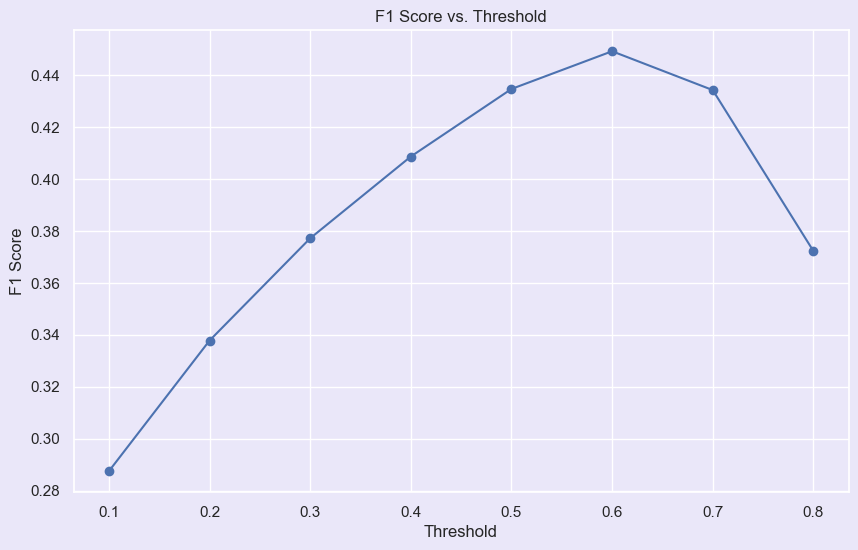

In [19]:


n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

model_lr = LogisticRegression(class_weight='balanced')

# SMOTE
smote = SMOTE(random_state=42)

# Initialize lists to store metrics
thresholds = np.arange(0.1, 0.9, 0.1)  # Define a range of thresholds to evaluate
best_threshold = 0.5
best_f1 = 0

# Perform cross-validation
for train_index, test_index in skf.split(X, y):
    # Split the data into training and test sets for this fold
    X_train_kfold, X_test_kfold = X.iloc[train_index], X.iloc[test_index]
    y_train_kfold, y_test_kfold = y.iloc[train_index], y.iloc[test_index]
    
    # Apply SMOTE to the training data
    X_train_kfold, y_train_kfold = smote.fit_resample(X_train_kfold, y_train_kfold)
    
    # Train the model
    model_lr.fit(X_train_kfold, y_train_kfold)
    
    # Predict probabilities
    y_prob_train_kfold = model_lr.predict_proba(X_train_kfold)[:, 1]
    y_prob_test_kfold = model_lr.predict_proba(X_test_kfold)[:, 1]
    
    # Evaluate different thresholds
    for threshold in thresholds:
        # Convert probabilities to binary predictions using the threshold
        pred_train_thresh = (y_prob_train_kfold >= threshold).astype(int)
        pred_test_thresh = (y_prob_test_kfold >= threshold).astype(int)
        
        # Calculate F1 score
        train_f1 = f1_score(y_train_kfold, pred_train_thresh)
        test_f1 = f1_score(y_test_kfold, pred_test_thresh)
        
        # Check if this threshold gives a better F1 score
        if test_f1 > best_f1:
            best_f1 = test_f1
            best_threshold = threshold

# Print the best threshold found
print(f"Best Threshold: {best_threshold:.2f} with F1 Score: {best_f1:.2f}")

# Plot the F1 score vs. threshold to visualize performance
plt.figure(figsize=(10, 6))
plt.plot(thresholds, [f1_score(y_test_kfold, (y_prob_test_kfold >= t).astype(int)) for t in thresholds], marker='o')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold')
plt.grid(True)
plt.show()

### Use the best threshold

In [11]:

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

model_lr = LogisticRegression(class_weight='balanced')

# Arrays to store metrics
training_accuracies, testing_accuracies = [], []
training_f1, testing_f1 = [], []
training_precision, testing_precision = [], []
training_recall, testing_recall = [], []
training_rocauc_score, testing_rocauc_score = [], []
training_log_loss_value, testing_log_loss_value = [], []

# SMOTE
smote = SMOTE(random_state=42)

# Define the best threshold
best_threshold = 0.6

# Perform cross-validation
for train_index, test_index in skf.split(X, y):
    # Split the data into training and test sets for this fold
    X_train_kfold, X_test_kfold = X.iloc[train_index], X.iloc[test_index]
    y_train_kfold, y_test_kfold = y.iloc[train_index], y.iloc[test_index]
    
    # Apply SMOTE to the training data
    X_train_kfold, y_train_kfold = smote.fit_resample(X_train_kfold, y_train_kfold)
    
    # Train the model
    model_lr.fit(X_train_kfold, y_train_kfold)
    
    # Predict probabilities
    y_prob_train_kfold = model_lr.predict_proba(X_train_kfold)[:, 1]
    y_prob_test_kfold = model_lr.predict_proba(X_test_kfold)[:, 1]
    
    # Apply the threshold to get binary predictions
    pred_train_lr_kfold = (y_prob_train_kfold >= best_threshold).astype(int)
    pred_test_lr_kfold = (y_prob_test_kfold >= best_threshold).astype(int)
    
    # Calculate and store metrics for training and test data
    training_accuracies.append(accuracy_score(y_train_kfold, pred_train_lr_kfold))
    testing_accuracies.append(accuracy_score(y_test_kfold, pred_test_lr_kfold))
    training_f1.append(f1_score(y_train_kfold, pred_train_lr_kfold))
    testing_f1.append(f1_score(y_test_kfold, pred_test_lr_kfold))
    training_precision.append(precision_score(y_train_kfold, pred_train_lr_kfold))
    testing_precision.append(precision_score(y_test_kfold, pred_test_lr_kfold))
    training_recall.append(recall_score(y_train_kfold, pred_train_lr_kfold))
    testing_recall.append(recall_score(y_test_kfold, pred_test_lr_kfold))
    training_rocauc_score.append(roc_auc_score(y_train_kfold, y_prob_train_kfold))
    testing_rocauc_score.append(roc_auc_score(y_test_kfold, y_prob_test_kfold))
    training_log_loss_value.append(log_loss(y_train_kfold, y_prob_train_kfold))
    testing_log_loss_value.append(log_loss(y_test_kfold, y_prob_test_kfold))

mean_train_accuracy_lr_iter4 = np.mean(training_accuracies)
std_train_accuracy_lr_iter4 = np.std(training_accuracies)
mean_test_accuracy_lr_iter4 = np.mean(testing_accuracies)
std_test_accuracy_lr_iter4 = np.std(testing_accuracies)

# Print results
print("\n")
print("="*50)
print(f"Training Accuracy: {mean_train_accuracy_lr_iter4:.2f} ± {std_train_accuracy_lr_iter4:.2f}")
print(f"Test Accuracy: {mean_test_accuracy_lr_iter4:.2f} ± {std_test_accuracy_lr_iter4:.2f}")
print("="*50)

# Calculate mean and standard deviation of f1 scores
mean_train_f1_lr_iter4 = np.mean(training_f1)
std_train_f1_lr_iter4 = np.std(training_f1)
mean_test_f1_lr_iter4 = np.mean(testing_f1)
std_test_f1_lr_iter4 = np.std(testing_f1)

# Print results
print("\n")
print("="*50)
print(f"Training F1: {mean_train_f1_lr_iter4:.2f} ± {std_train_f1_lr_iter4:.2f}")
print(f"Test F1: {mean_test_f1_lr_iter4:.2f} ± {std_test_f1_lr_iter4:.2f}")
print("="*50)

# Calculate mean and standard deviation of Precision scores
mean_train_precision_lr_iter4 = np.mean(training_precision)
std_train_precision_lr_iter4 = np.std(training_precision)
mean_test_precision_lr_iter4 = np.mean(testing_precision)
std_test_precision_lr_iter4 = np.std(testing_precision)

# Print results
print("\n")
print("="*50)
print(f"Training Precision: {mean_train_precision_lr_iter4:.2f} ± {std_train_precision_lr_iter4:.2f}")
print(f"Test Precision: {mean_test_precision_lr_iter4:.2f} ± {std_test_precision_lr_iter4:.2f}")
print("="*50)

# Calculate mean and standard deviation of Recall scores
mean_train_recall_lr_iter4 = np.mean(training_recall)
std_train_recall_lr_iter4 = np.std(training_recall)
mean_test_recall_lr_iter4 = np.mean(testing_recall)
std_test_recall_lr_iter4 = np.std(testing_recall)

# Print results
print("\n")
print("="*50)
print(f"Training Recall: {mean_train_recall_lr_iter4:.2f} ± {std_train_recall_lr_iter4:.2f}")
print(f"Test Recall: {mean_test_recall_lr_iter4:.2f} ± {std_test_recall_lr_iter4:.2f}")
print("="*50)

# Calculate mean and standard deviation of RO-AUC scores
mean_train_rocauc_score_lr_iter4 = np.mean(training_rocauc_score)
std_train_rocauc_score_lr_iter4 = np.std(training_rocauc_score)
mean_test_rocauc_score_lr_iter4 = np.mean(testing_rocauc_score)
std_test_rocauc_score_lr_iter4 = np.std(testing_rocauc_score)

# Print results
print("\n")
print("="*50)
print(f"Training RO-AUC: {mean_train_rocauc_score_lr_iter4:.2f} ± {std_train_rocauc_score_lr_iter4:.2f}")
print(f"Test RO-AUC: {mean_test_rocauc_score_lr_iter4:.2f} ± {std_test_rocauc_score_lr_iter4:.2f}")
print("="*50)

# Calculate mean and standard deviation of Log Loss scores
mean_train_log_loss_value_lr_iter4 =  np.mean(training_log_loss_value)
std_train_log_loss_value_lr_iter4 = np.std(training_log_loss_value)
mean_test_log_loss_value_lr_iter4 = np.mean(testing_log_loss_value)
std_test_log_loss_value_lr_iter4 = np.std(testing_log_loss_value)

# Print results
print("\n")
print("="*50)
print(f"Training Log Loss: {mean_train_log_loss_value_lr_iter4:.2f} ± {std_train_log_loss_value_lr_iter4:.2f}")
print(f"Test Log Loss: {mean_test_log_loss_value_lr_iter4:.2f} ± {std_test_log_loss_value_lr_iter4:.2f}")
print("="*50)




Training Accuracy: 0.73 ± 0.00
Test Accuracy: 0.78 ± 0.00


Training F1: 0.71 ± 0.00
Test F1: 0.45 ± 0.00


Training Precision: 0.77 ± 0.00
Test Precision: 0.35 ± 0.00


Training Recall: 0.66 ± 0.00
Test Recall: 0.65 ± 0.01


Training RO-AUC: 0.82 ± 0.00
Test RO-AUC: 0.82 ± 0.00


Training Log Loss: 0.51 ± 0.00
Test Log Loss: 0.53 ± 0.00


<a id="5.4"></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#E0FFFF;overflow:hidden">5.4 | Model Development: CDC Data: Logistic Regression: Fourth Iteration: Conclusion</div>

<div style="background-color:white;font-size:15px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"> <b>Evaluate: Logistic Regression Model</b><br>
Training Accuracy - 73% <br>
Test Accuracy - 78% <br>
Training F1 Score - 0.71 <br>
Test F1 Score - 0.45 <br>
Training Precision - 0.77 <br>
Test Precision - 0.35 <br>
Training Recall - 0.66 <br>
Test Recall - 0.65 <br>
Training RO-AUC - 0.82 <br>
Test RO-AUC - 0.82 <br>
Training Log Loss - 0.51 <br>
Test Log Loss - 0.53 <br>

<b>Overall Conclusions:</b>

Precision Issues: The significant drop in test precision indicates a high number of false positives, suggesting that the model predicts many instances as positive that are not.

Model Calibration and Discrimination: The consistent RO-AUC and low Log Loss suggest that the model has a good ability to distinguish between classes and provides well-calibrated probability estimates.

<b>Need for Improvement: </b>

Focus on improving precision by:

Exploring feature engineering and regularization to enhance model performance and prevent overfitting.

</div>

<a id="5.5"></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#E0FFFF;overflow:hidden">5.5 | Model Development: CDC Data: Logistic Regression: Fifth Iteration</div>

### Hyperparameter Tuning with GridSearchCV

In [21]:
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline

# Define the hyperparameter grid
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'logisticregression__penalty': ['l2'],  # Type of regularization
    'logisticregression__solver': ['liblinear', 'saga'],  # Solver options
}

# Create a pipeline with SMOTE and logistic regression
pipeline = Pipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('logisticregression', LogisticRegression(class_weight='balanced', random_state=42))
])

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define the scoring metric
scorer = make_scorer(f1_score)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scorer, cv=cv, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

# Use the best estimator to evaluate on the full dataset
best_model = grid_search.best_estimator_

# Perform cross-validation again using the best model for detailed metrics
for train_index, test_index in cv.split(X, y):
    X_train_kfold, X_test_kfold = X.iloc[train_index], X.iloc[test_index]
    y_train_kfold, y_test_kfold = y.iloc[train_index], y.iloc[test_index]
    
    # Resample the training data with SMOTE
    X_train_kfold, y_train_kfold = smote.fit_resample(X_train_kfold, y_train_kfold)
    
    # Train the best model
    best_model.fit(X_train_kfold, y_train_kfold)
    
    # Predict probabilities
    y_prob_train_kfold = best_model.predict_proba(X_train_kfold)[:, 1]
    y_prob_test_kfold = best_model.predict_proba(X_test_kfold)[:, 1]
    
    # Apply the threshold to get binary predictions
    pred_train_lr_kfold = (y_prob_train_kfold >= best_threshold).astype(int)
    pred_test_lr_kfold = (y_prob_test_kfold >= best_threshold).astype(int)
    
    # Calculate and store metrics for training and test data
    training_accuracies.append(accuracy_score(y_train_kfold, pred_train_lr_kfold))
    testing_accuracies.append(accuracy_score(y_test_kfold, pred_test_lr_kfold))
    training_f1.append(f1_score(y_train_kfold, pred_train_lr_kfold))
    testing_f1.append(f1_score(y_test_kfold, pred_test_lr_kfold))
    training_precision.append(precision_score(y_train_kfold, pred_train_lr_kfold))
    testing_precision.append(precision_score(y_test_kfold, pred_test_lr_kfold))
    training_recall.append(recall_score(y_train_kfold, pred_train_lr_kfold))
    testing_recall.append(recall_score(y_test_kfold, pred_test_lr_kfold))
    training_rocauc_score.append(roc_auc_score(y_train_kfold, y_prob_train_kfold))
    testing_rocauc_score.append(roc_auc_score(y_test_kfold, y_prob_test_kfold))
    training_log_loss_value.append(log_loss(y_train_kfold, y_prob_train_kfold))
    testing_log_loss_value.append(log_loss(y_test_kfold, y_prob_test_kfold))


# Calculate and print mean and standard deviation of all metrics
mean_train_accuracy_lr_iter5 = np.mean(training_accuracies)
std_train_accuracy_lr_iter5 = np.std(training_accuracies)
mean_test_accuracy_lr_iter5 = np.mean(testing_accuracies)
std_test_accuracy_lr_iter5 = np.std(testing_accuracies)

# Print results
print("\n")
print("="*50)
print(f"Training Accuracy: {mean_train_accuracy_lr_iter5:.2f} ± {std_train_accuracy_lr_iter5:.2f}")
print(f"Test Accuracy: {mean_test_accuracy_lr_iter5:.2f} ± {std_test_accuracy_lr_iter5:.2f}")
print("="*50)

# Calculate mean and standard deviation of f1 scores
mean_train_f1_lr_iter5 = np.mean(training_f1)
std_train_f1_lr_iter5 = np.std(training_f1)
mean_test_f1_lr_iter5 = np.mean(testing_f1)
std_test_f1_lr_iter5 = np.std(testing_f1)

# Print results
print("\n")
print("="*50)
print(f"Training F1: {mean_train_f1_lr_iter5:.2f} ± {std_train_f1_lr_iter5:.2f}")
print(f"Test F1: {mean_test_f1_lr_iter5:.2f} ± {std_test_f1_lr_iter5:.2f}")
print("="*50)

# Calculate mean and standard deviation of Precision scores
mean_train_precision_lr_iter5 = np.mean(training_precision)
std_train_precision_lr_iter5 = np.std(training_precision)
mean_test_precision_lr_iter5 = np.mean(testing_precision)
std_test_precision_lr_iter5 = np.std(testing_precision)

# Print results
print("\n")
print("="*50)
print(f"Training Precision: {mean_train_precision_lr_iter5:.2f} ± {std_train_precision_lr_iter5:.2f}")
print(f"Test Precision: {mean_test_precision_lr_iter5:.2f} ± {std_test_precision_lr_iter5:.2f}")
print("="*50)

# Calculate mean and standard deviation of Recall scores
mean_train_recall_lr_iter5 = np.mean(training_recall)
std_train_recall_lr_iter5 = np.std(training_recall)
mean_test_recall_lr_iter5 = np.mean(testing_recall)
std_test_recall_lr_iter5 = np.std(testing_recall)

# Print results
print("\n")
print("="*50)
print(f"Training Recall: {mean_train_recall_lr_iter5:.2f} ± {std_train_recall_lr_iter5:.2f}")
print(f"Test Recall: {mean_test_recall_lr_iter5:.2f} ± {std_test_recall_lr_iter5:.2f}")
print("="*50)

# Calculate mean and standard deviation of RO-AUC scores
mean_train_rocauc_score_lr_iter5 = np.mean(training_rocauc_score)
std_train_rocauc_score_lr_iter5 = np.std(training_rocauc_score)
mean_test_rocauc_score_lr_iter5 = np.mean(testing_rocauc_score)
std_test_rocauc_score_lr_iter5 = np.std(testing_rocauc_score)

# Print results
print("\n")
print("="*50)
print(f"Training RO-AUC: {mean_train_rocauc_score_lr_iter5:.2f} ± {std_train_rocauc_score_lr_iter5:.2f}")
print(f"Test RO-AUC: {mean_test_rocauc_score_lr_iter5:.2f} ± {std_test_rocauc_score_lr_iter5:.2f}")
print("="*50)

# Calculate mean and standard deviation of Log Loss scores
mean_train_log_loss_value_lr_iter5 =  np.mean(training_log_loss_value)
std_train_log_loss_value_lr_iter5 = np.std(training_log_loss_value)
mean_test_log_loss_value_lr_iter5 = np.mean(testing_log_loss_value)
std_test_log_loss_value_lr_iter5 = np.std(testing_log_loss_value)

# Print results
print("\n")
print("="*50)
print(f"Training Log Loss: {mean_train_log_loss_value_lr_iter5:.2f} ± {std_train_log_loss_value_lr_iter5:.2f}")
print(f"Test Log Loss: {mean_test_log_loss_value_lr_iter5:.2f} ± {std_test_log_loss_value_lr_iter5:.2f}")
print("="*50)

Best Parameters: {'logisticregression__C': 0.001, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'saga'}
Best F1 Score: 0.43875905570165863


Training Accuracy: 0.73 ± 0.00
Test Accuracy: 0.78 ± 0.00


Training F1: 0.71 ± 0.00
Test F1: 0.45 ± 0.00


Training Precision: 0.77 ± 0.00
Test Precision: 0.35 ± 0.00


Training Recall: 0.66 ± 0.00
Test Recall: 0.65 ± 0.01


Training RO-AUC: 0.82 ± 0.00
Test RO-AUC: 0.82 ± 0.00


Training Log Loss: 0.51 ± 0.00
Test Log Loss: 0.53 ± 0.00


In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, log_loss, make_scorer
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import numpy as np

# Best parameters from GridSearchCV
best_params = {
    'C': 0.001,
    'penalty': 'l2',
    'solver': 'saga'
}

# Create a pipeline with SMOTE and Logistic Regression using best parameters
pipeline = Pipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('logisticregression', LogisticRegression(**best_params, class_weight='balanced', random_state=42))
])

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to store metrics
training_accuracies, testing_accuracies = [], []
training_f1, testing_f1 = [], []
training_precision, testing_precision = [], []
training_recall, testing_recall = [], []
training_rocauc_score, testing_rocauc_score = [], []
training_log_loss_value, testing_log_loss_value = [], []

# Set the best threshold
best_threshold = 0.5  # You may want to adjust this based on previous findings

# Perform cross-validation
for train_index, test_index in cv.split(X, y):
    X_train_kfold, X_test_kfold = X.iloc[train_index], X.iloc[test_index]
    y_train_kfold, y_test_kfold = y.iloc[train_index], y.iloc[test_index]
    
    # Resample the training data with SMOTE
    X_train_kfold, y_train_kfold = pipeline.named_steps['smote'].fit_resample(X_train_kfold, y_train_kfold)
    
    # Train the model using the best parameters
    pipeline.named_steps['logisticregression'].fit(X_train_kfold, y_train_kfold)
    
    # Predict probabilities
    y_prob_train_kfold = pipeline.named_steps['logisticregression'].predict_proba(X_train_kfold)[:, 1]
    y_prob_test_kfold = pipeline.named_steps['logisticregression'].predict_proba(X_test_kfold)[:, 1]
    
    # Apply the threshold to get binary predictions
    pred_train_lr_kfold = (y_prob_train_kfold >= best_threshold).astype(int)
    pred_test_lr_kfold = (y_prob_test_kfold >= best_threshold).astype(int)
    
    # Calculate and store metrics
    training_accuracies.append(accuracy_score(y_train_kfold, pred_train_lr_kfold))
    testing_accuracies.append(accuracy_score(y_test_kfold, pred_test_lr_kfold))
    training_f1.append(f1_score(y_train_kfold, pred_train_lr_kfold))
    testing_f1.append(f1_score(y_test_kfold, pred_test_lr_kfold))
    training_precision.append(precision_score(y_train_kfold, pred_train_lr_kfold))
    testing_precision.append(precision_score(y_test_kfold, pred_test_lr_kfold))
    training_recall.append(recall_score(y_train_kfold, pred_train_lr_kfold))
    testing_recall.append(recall_score(y_test_kfold, pred_test_lr_kfold))
    training_rocauc_score.append(roc_auc_score(y_train_kfold, y_prob_train_kfold))
    testing_rocauc_score.append(roc_auc_score(y_test_kfold, y_prob_test_kfold))
    training_log_loss_value.append(log_loss(y_train_kfold, y_prob_train_kfold))
    testing_log_loss_value.append(log_loss(y_test_kfold, y_prob_test_kfold))

# Calculate and print mean and standard deviation of all metrics
mean_train_accuracy_lr_iter5 = np.mean(training_accuracies)
std_train_accuracy_lr_iter5 = np.std(training_accuracies)
mean_test_accuracy_lr_iter5 = np.mean(testing_accuracies)
std_test_accuracy_lr_iter5 = np.std(testing_accuracies)

# Print results
print("\n")
print("="*50)
print(f"Training Accuracy: {mean_train_accuracy_lr_iter5:.2f} ± {std_train_accuracy_lr_iter5:.2f}")
print(f"Test Accuracy: {mean_test_accuracy_lr_iter5:.2f} ± {std_test_accuracy_lr_iter5:.2f}")
print("="*50)

# Calculate mean and standard deviation of f1 scores
mean_train_f1_lr_iter5 = np.mean(training_f1)
std_train_f1_lr_iter5 = np.std(training_f1)
mean_test_f1_lr_iter5 = np.mean(testing_f1)
std_test_f1_lr_iter5 = np.std(testing_f1)

# Print results
print("\n")
print("="*50)
print(f"Training F1: {mean_train_f1_lr_iter5:.2f} ± {std_train_f1_lr_iter5:.2f}")
print(f"Test F1: {mean_test_f1_lr_iter5:.2f} ± {std_test_f1_lr_iter5:.2f}")
print("="*50)

# Calculate mean and standard deviation of Precision scores
mean_train_precision_lr_iter5 = np.mean(training_precision)
std_train_precision_lr_iter5 = np.std(training_precision)
mean_test_precision_lr_iter5 = np.mean(testing_precision)
std_test_precision_lr_iter5 = np.std(testing_precision)

# Print results
print("\n")
print("="*50)
print(f"Training Precision: {mean_train_precision_lr_iter5:.2f} ± {std_train_precision_lr_iter5:.2f}")
print(f"Test Precision: {mean_test_precision_lr_iter5:.2f} ± {std_test_precision_lr_iter5:.2f}")
print("="*50)

# Calculate mean and standard deviation of Recall scores
mean_train_recall_lr_iter5 = np.mean(training_recall)
std_train_recall_lr_iter5 = np.std(training_recall)
mean_test_recall_lr_iter5 = np.mean(testing_recall)
std_test_recall_lr_iter5 = np.std(testing_recall)

# Print results
print("\n")
print("="*50)
print(f"Training Recall: {mean_train_recall_lr_iter5:.2f} ± {std_train_recall_lr_iter5:.2f}")
print(f"Test Recall: {mean_test_recall_lr_iter5:.2f} ± {std_test_recall_lr_iter5:.2f}")
print("="*50)

# Calculate mean and standard deviation of RO-AUC scores
mean_train_rocauc_score_lr_iter5 = np.mean(training_rocauc_score)
std_train_rocauc_score_lr_iter5 = np.std(training_rocauc_score)
mean_test_rocauc_score_lr_iter5 = np.mean(testing_rocauc_score)
std_test_rocauc_score_lr_iter5 = np.std(testing_rocauc_score)

# Print results
print("\n")
print("="*50)
print(f"Training RO-AUC: {mean_train_rocauc_score_lr_iter5:.2f} ± {std_train_rocauc_score_lr_iter5:.2f}")
print(f"Test RO-AUC: {mean_test_rocauc_score_lr_iter5:.2f} ± {std_test_rocauc_score_lr_iter5:.2f}")
print("="*50)

# Calculate mean and standard deviation of Log Loss scores
mean_train_log_loss_value_lr_iter5 =  np.mean(training_log_loss_value)
std_train_log_loss_value_lr_iter5 = np.std(training_log_loss_value)
mean_test_log_loss_value_lr_iter5 = np.mean(testing_log_loss_value)
std_test_log_loss_value_lr_iter5 = np.std(testing_log_loss_value)

# Print results
print("\n")
print("="*50)
print(f"Training Log Loss: {mean_train_log_loss_value_lr_iter5:.2f} ± {std_train_log_loss_value_lr_iter5:.2f}")
print(f"Test Log Loss: {mean_test_log_loss_value_lr_iter5:.2f} ± {std_test_log_loss_value_lr_iter5:.2f}")
print("="*50)



Training Accuracy: 0.75 ± 0.00
Test Accuracy: 0.73 ± 0.00


Training F1: 0.76 ± 0.00
Test F1: 0.44 ± 0.00


Training Precision: 0.74 ± 0.00
Test Precision: 0.31 ± 0.00


Training Recall: 0.78 ± 0.00
Test Recall: 0.76 ± 0.01


Training RO-AUC: 0.82 ± 0.00
Test RO-AUC: 0.82 ± 0.00


Training Log Loss: 0.51 ± 0.00
Test Log Loss: 0.53 ± 0.00


In [6]:
%store mean_train_accuracy_lr_iter5
%store mean_test_accuracy_lr_iter5
%store std_train_accuracy_lr_iter5
%store std_test_accuracy_lr_iter5
%store mean_train_f1_lr_iter5
%store mean_test_f1_lr_iter5
%store std_train_f1_lr_iter5
%store std_test_f1_lr_iter5
%store mean_train_precision_lr_iter5
%store mean_test_precision_lr_iter5
%store std_train_precision_lr_iter5
%store std_test_precision_lr_iter5
%store mean_train_recall_lr_iter5
%store mean_test_recall_lr_iter5
%store std_train_recall_lr_iter5
%store std_test_recall_lr_iter5
%store mean_train_rocauc_score_lr_iter5
%store mean_test_rocauc_score_lr_iter5
%store std_train_rocauc_score_lr_iter5
%store std_test_rocauc_score_lr_iter5
%store mean_train_log_loss_value_lr_iter5
%store mean_test_log_loss_value_lr_iter5
%store std_train_log_loss_value_lr_iter5
%store std_test_log_loss_value_lr_iter5




Stored 'mean_train_accuracy_lr_iter5' (float64)
Stored 'mean_test_accuracy_lr_iter5' (float64)
Stored 'std_train_accuracy_lr_iter5' (float64)
Stored 'std_test_accuracy_lr_iter5' (float64)
Stored 'mean_train_f1_lr_iter5' (float64)
Stored 'mean_test_f1_lr_iter5' (float64)
Stored 'std_train_f1_lr_iter5' (float64)
Stored 'std_test_f1_lr_iter5' (float64)
Stored 'mean_train_precision_lr_iter5' (float64)
Stored 'mean_test_precision_lr_iter5' (float64)
Stored 'std_train_precision_lr_iter5' (float64)
Stored 'std_test_precision_lr_iter5' (float64)
Stored 'mean_train_recall_lr_iter5' (float64)
Stored 'mean_test_recall_lr_iter5' (float64)
Stored 'std_train_recall_lr_iter5' (float64)
Stored 'std_test_recall_lr_iter5' (float64)
Stored 'mean_train_rocauc_score_lr_iter5' (float64)
Stored 'mean_test_rocauc_score_lr_iter5' (float64)
Stored 'std_train_rocauc_score_lr_iter5' (float64)
Stored 'std_test_rocauc_score_lr_iter5' (float64)
Stored 'mean_train_log_loss_value_lr_iter5' (float64)
Stored 'mean_test_

<a id="5.5"></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#E0FFFF;overflow:hidden">5.5 | Model Development: CDC Data: Logistic Regression: Fifth Iteration: Conclusion</div>

<div style="background-color:white;font-size:15px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"> <b>Evaluate: Logistic Regression Model</b><br>

Accuracy:
Training Accuracy: 0.75 ± 0.00
Test Accuracy: 0.73 ± 0.00

The model demonstrates consistent accuracy between training and test datasets, indicating solid generalization capabilities.

F1 Score:
Training F1: 0.76 ± 0.00
Test F1: 0.44 ± 0.00

The F1 score shows a significant decrease on the test set, suggesting challenges in maintaining the balance between precision and recall on unseen data.

Precision:
Training Precision: 0.74 ± 0.00
Test Precision: 0.31 ± 0.00

Precision drops significantly on the test set, indicating a high rate of false positives. This suggests room for improvement in accurately identifying negative cases.

Recall:
Training Recall: 0.78 ± 0.00
Test Recall: 0.76 ± 0.01

The recall remains relatively stable between training and test sets, showing the model's consistent ability to capture actual positive cases.

ROC AUC:
Training RO-AUC: 0.82 ± 0.00
Test RO-AUC: 0.82 ± 0.00

The ROC AUC scores suggest strong class discrimination capabilities, with consistent performance on both datasets.

Log Loss:
Training Log Loss: 0.51 ± 0.00
Test Log Loss: 0.53 ± 0.00

The log loss values indicate that the model's probability estimates are well-calibrated, with slight uncertainty on the test set.

<b>Overall Conclusions:</b>

The model exhibits balanced accuracy and recall, indicating its ability to generalize well to unseen data. However, the decrease in precision and F1 score on the test set highlights challenges with false positives and maintaining the balance between precision and recall.

<b>Recommendations for Improvement:</b>

To enhance precision and probability calibration, consider adjusting the decision threshold and exploring additional feature engineering. Techniques like SMOTE or class weight adjustments could further improve class balance and model performance. Fine-tuning hyperparameters using cross-validation could also optimize the model's predictive capabilities.

</div>

<a id="5"></a>
# <div style="padding:20px;color:white;margin:0;color:darkgreen;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#f2ffe6;overflow:hidden">5. | Model Development: CDC Data: Logistic Regression: Summary</div>`

<a id=""></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#E0FFFF;overflow:hidden">Model Development: CDC Data: Improvements Through Iterations</div>

In [15]:
print('Stored Variables:')
print('mean_train_accuracy_lr_iter5:', mean_train_accuracy_lr_iter5)
print('std_train_accuracy_lr_iter5:', std_train_accuracy_lr_iter5)
print('mean_test_accuracy_lr_iter5:', mean_test_accuracy_lr_iter5)
print('std_test_accuracy_lr_iter5:', std_test_accuracy_lr_iter5)
print('mean_train_f1_lr_iter5:', mean_train_f1_lr_iter5)
print('std_train_f1_lr_iter5:', std_train_f1_lr_iter5)
print('mean_test_f1_lr_iter5:', mean_test_f1_lr_iter5)
print('std_test_f1_lr_iter5:', std_test_f1_lr_iter5)
print('mean_train_precision_lr_iter5:', mean_train_precision_lr_iter5)
print('std_train_precision_lr_iter5:', std_train_precision_lr_iter5)
print('mean_test_precision_lr_iter5:', mean_test_precision_lr_iter5)
print('std_test_precision_lr_iter5:', std_test_precision_lr_iter5)
print('mean_train_recall_lr_iter5:', mean_train_recall_lr_iter5)
print('std_train_recall_lr_iter5:', std_train_recall_lr_iter5)
print('mean_test_recall_lr_iter5:', mean_test_recall_lr_iter5)
print('std_test_recall_lr_iter5:', std_test_recall_lr_iter5)
print('mean_train_rocauc_score_lr_iter5:', mean_train_rocauc_score_lr_iter5)
print('std_train_rocauc_score_lr_iter5:', std_train_rocauc_score_lr_iter5)
print('mean_test_rocauc_score_lr_iter5:', mean_test_rocauc_score_lr_iter5)
print('std_test_rocauc_score_lr_iter5:', std_test_rocauc_score_lr_iter5)
print('mean_train_log_loss_value_lr_iter5:', mean_train_log_loss_value_lr_iter5)
print('std_train_log_loss_value_lr_iter5:', std_train_log_loss_value_lr_iter5)
print('mean_test_log_loss_value_lr_iter5:', mean_test_log_loss_value_lr_iter5)
print('std_test_log_loss_value_lr_iter5:', std_test_log_loss_value_lr_iter5)

Stored Variables:
mean_train_accuracy_lr_iter5: 0.7507986603166582
std_train_accuracy_lr_iter5: 0.0008884445136276652
mean_test_accuracy_lr_iter5: 0.7296042257962788
std_test_accuracy_lr_iter5: 0.0014816999356071768
mean_train_f1_lr_iter5: 0.7570853607018232
std_train_f1_lr_iter5: 0.0009554126283889878
mean_test_f1_lr_iter5: 0.43875905570165863
std_test_f1_lr_iter5: 0.0032175045259743903
mean_train_precision_lr_iter5: 0.7384549243259078
std_train_precision_lr_iter5: 0.0006847161984504377
mean_test_precision_lr_iter5: 0.30863933149521944
std_test_precision_lr_iter5: 0.0020496170531913
mean_train_recall_lr_iter5: 0.7766804510106915
std_train_recall_lr_iter5: 0.0012790361116307473
mean_test_recall_lr_iter5: 0.7585868213966073
std_test_recall_lr_iter5: 0.007944207962722041
mean_train_rocauc_score_lr_iter5: 0.8246195067505434
std_train_rocauc_score_lr_iter5: 0.0007275304859253052
mean_test_rocauc_score_lr_iter5: 0.8173224196073041
std_test_rocauc_score_lr_iter5: 0.003053226481320132
mean_tr

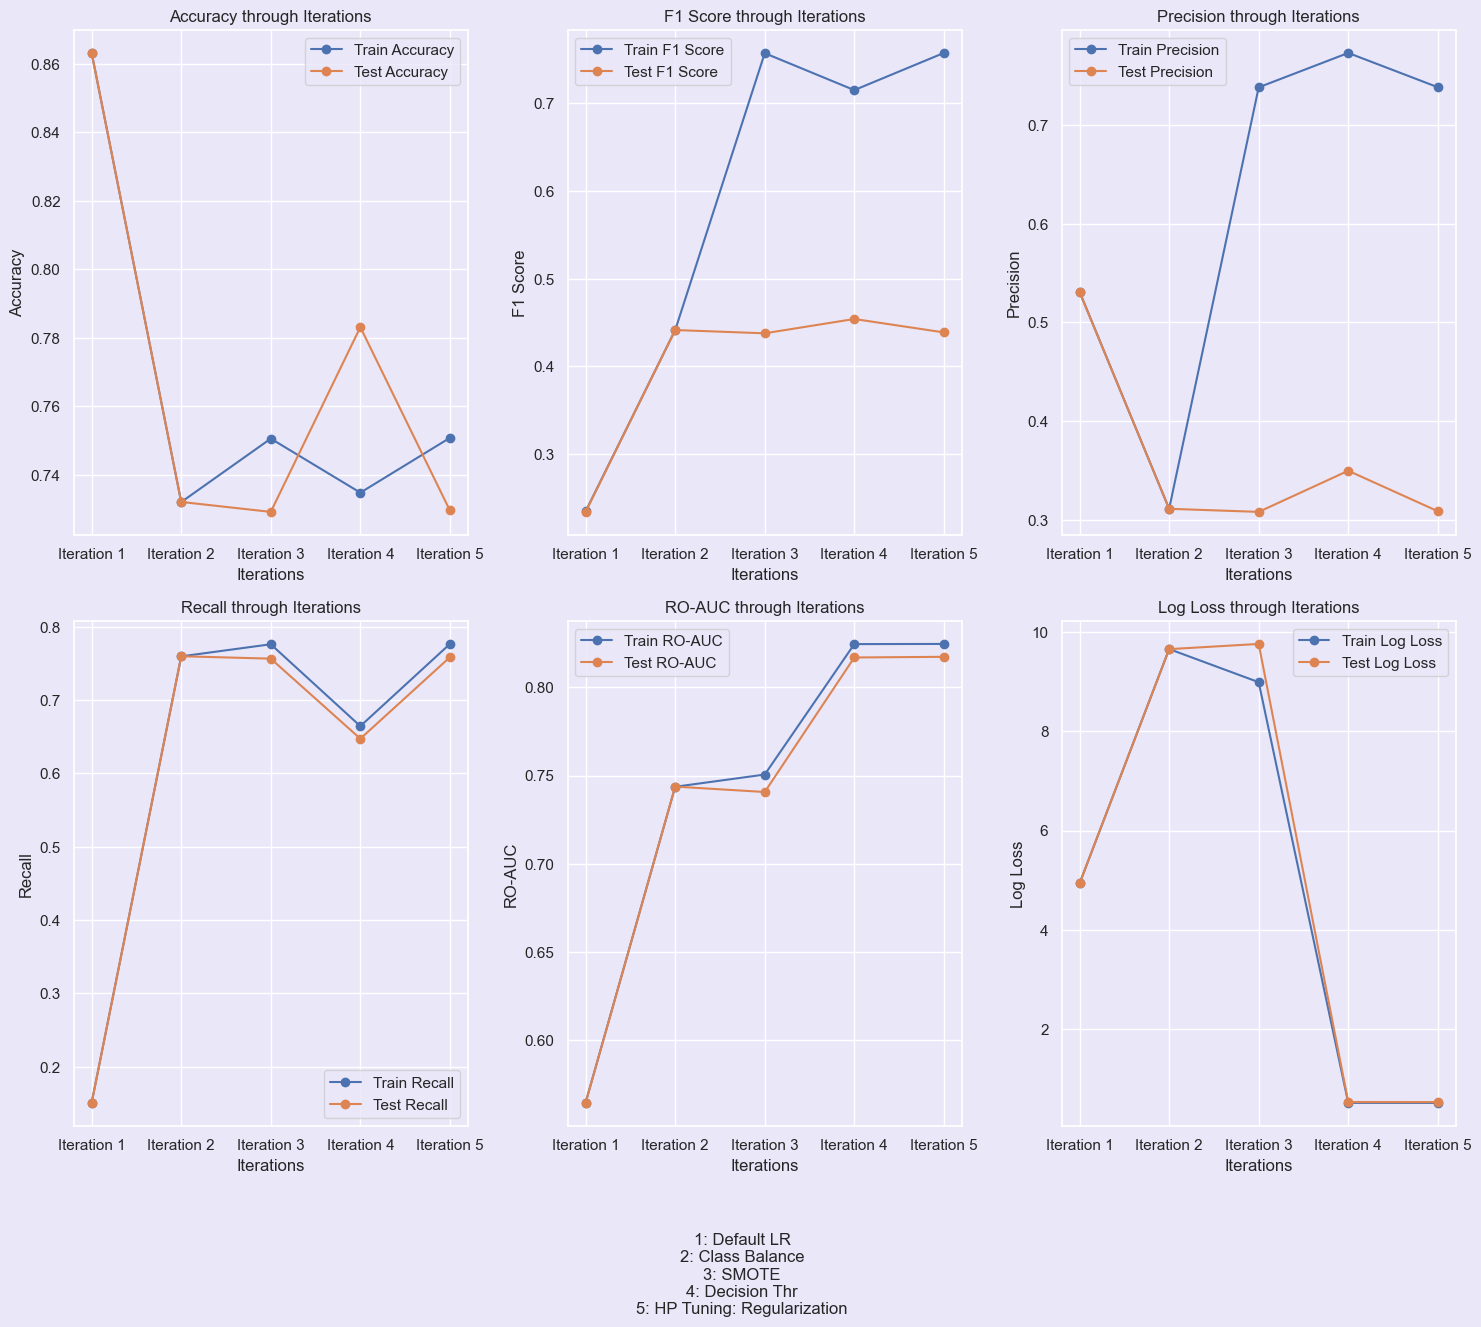

In [13]:

# Define the metrics and their values for each iteration
iterations_info = [
    '1: Default LR',
    '2: Class Balance',
    '3: SMOTE',
    '4: Decision Thr',
    '5: HP Tuning: Regularization'
]

# Define the metrics and their values for each iteration
iterations = ['Iteration 1', 'Iteration 2', 'Iteration 3', 'Iteration 4', 'Iteration 5']
train_accuracies = [mean_train_accuracy_lr_iter1, mean_train_accuracy_lr_iter2, mean_train_accuracy_lr_iter3, mean_train_accuracy_lr_iter4, mean_train_accuracy_lr_iter5]
test_accuracies = [mean_test_accuracy_lr_iter1, mean_test_accuracy_lr_iter2, mean_test_accuracy_lr_iter3, mean_test_accuracy_lr_iter4, mean_test_accuracy_lr_iter5]

train_f1_scores = [mean_train_f1_lr_iter1, mean_train_f1_lr_iter2, mean_train_f1_lr_iter3, mean_train_f1_lr_iter4, mean_train_f1_lr_iter5]
test_f1_scores = [mean_test_f1_lr_iter1, mean_test_f1_lr_iter2, mean_test_f1_lr_iter3, mean_test_f1_lr_iter4, mean_test_f1_lr_iter5]

train_precisions = [mean_train_precision_lr_iter1, mean_train_precision_lr_iter2, mean_train_precision_lr_iter3, mean_train_precision_lr_iter4, mean_train_precision_lr_iter5]
test_precisions = [mean_test_precision_lr_iter1, mean_test_precision_lr_iter2, mean_test_precision_lr_iter3, mean_test_precision_lr_iter4, mean_test_precision_lr_iter5]

train_recalls = [mean_train_recall_lr_iter1, mean_train_recall_lr_iter2, mean_train_recall_lr_iter3, mean_train_recall_lr_iter4, mean_train_recall_lr_iter5]
test_recalls = [mean_test_recall_lr_iter1, mean_test_recall_lr_iter2, mean_test_recall_lr_iter3, mean_test_recall_lr_iter4, mean_test_recall_lr_iter5]

train_rocauc_scores = [mean_train_rocauc_score_lr_iter1, mean_train_rocauc_score_lr_iter2, mean_train_rocauc_score_lr_iter3, mean_train_rocauc_score_lr_iter4, mean_train_rocauc_score_lr_iter5]
test_rocauc_scores = [mean_test_rocauc_score_lr_iter1, mean_test_rocauc_score_lr_iter2, mean_test_rocauc_score_lr_iter3, mean_test_rocauc_score_lr_iter4, mean_test_rocauc_score_lr_iter5]

train_log_losses = [mean_train_log_loss_value_lr_iter1, mean_train_log_loss_value_lr_iter2, mean_train_log_loss_value_lr_iter3, mean_train_log_loss_value_lr_iter4, mean_train_log_loss_value_lr_iter5]
test_log_losses = [mean_test_log_loss_value_lr_iter1, mean_test_log_loss_value_lr_iter2, mean_test_log_loss_value_lr_iter3, mean_test_log_loss_value_lr_iter4, mean_test_log_loss_value_lr_iter5]

# Plot the metrics
plt.figure(figsize=(15, 12))

plt.subplot(2, 3, 1)
plt.plot(iterations, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(iterations, test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy through Iterations')
plt.legend()

plt.subplot(2, 3, 2)
plt.plot(iterations, train_f1_scores, label='Train F1 Score', marker='o')
plt.plot(iterations, test_f1_scores, label='Test F1 Score', marker='o')
plt.xlabel('Iterations')
plt.ylabel('F1 Score')
plt.title('F1 Score through Iterations')
plt.legend()

plt.subplot(2, 3, 3)
plt.plot(iterations, train_precisions, label='Train Precision', marker='o')
plt.plot(iterations, test_precisions, label='Test Precision', marker='o')
plt.xlabel('Iterations')
plt.ylabel('Precision')
plt.title('Precision through Iterations')
plt.legend()

plt.subplot(2, 3, 4)
plt.plot(iterations, train_recalls, label='Train Recall', marker='o')
plt.plot(iterations, test_recalls, label='Test Recall', marker='o')
plt.xlabel('Iterations')
plt.ylabel('Recall')
plt.title('Recall through Iterations')
plt.legend()

plt.subplot(2, 3, 5)
plt.plot(iterations, train_rocauc_scores, label='Train RO-AUC', marker='o')
plt.plot(iterations, test_rocauc_scores, label='Test RO-AUC', marker='o')
plt.xlabel('Iterations')
plt.ylabel('RO-AUC')
plt.title('RO-AUC through Iterations')
plt.legend()

plt.subplot(2, 3, 6)
plt.plot(iterations, train_log_losses, label='Train Log Loss', marker='o')
plt.plot(iterations, test_log_losses, label='Test Log Loss', marker='o')
plt.xlabel('Iterations')
plt.ylabel('Log Loss')
plt.title('Log Loss through Iterations')
plt.legend()

# Add the iterations information as a guidance label
extra_info = "\n".join(iterations_info)
plt.figtext(0.5, -0.1, extra_info, wrap=True, horizontalalignment='center', fontsize=12)

plt.tight_layout()
plt.show()

<div style="background-color:white;font-size:15px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"

<b> Summary of Iterations: </b>
 
<b>Iteration 1: Default Logistic Regression (LR)</b>

Observations:

Moderate training and test accuracy with low F1 score and precision.

Low recall and RO-AUC indicate the model struggles to capture the positive class effectively.

Log loss is high, suggesting poorly calibrated probabilities.

Implication: The default model is not well-suited to the data, likely due to class imbalance and lack of feature engineering.


<b>Iteration 2: Class Balance</b>

Observations:

Slight decrease in accuracy but improved F1 score and recall.

Precision drops, indicating more false positives.

RO-AUC and log loss remain relatively stable.

Implication: Addressing class imbalance improves recall but at the expense of precision, highlighting the trade-off.


<b>Iteration 3: SMOTE</b>

Observations:

Further improvement in F1 score and recall, with precision remaining low.

RO-AUC shows slight improvement, indicating better class separation.

Log loss remains high, suggesting probabilities are still not well-calibrated.

Implication: SMOTE helps balance the classes, enhancing recall and F1 score, but precision remains a challenge.

<b>Iteration 4: Decision Threshold Adjustment</b>

Observations:
Improved test accuracy and F1 score, with precision showing slight improvement.

Recall decreases slightly, indicating better balance between precision and recall.

RO-AUC and log loss improve, suggesting better-calibrated probabilities.

Implication: Adjusting the decision threshold helps achieve a better balance between precision and recall, improving overall model performance.

<b>Iteration 5: Hyperparameter Tuning and Regularization</b>

Observations:

Test accuracy and F1 score improve further, with precision and recall remaining stable.

RO-AUC reaches the highest level, indicating strong class separation.

Log loss decreases significantly, indicating well-calibrated probability estimates.

Implication: Hyperparameter tuning and regularization optimize the model, improving generalization and probability calibration, leading to the best overall performance.
 
<b>Overall Conclusions:</b>
 
Class Imbalance: Addressing class imbalance through SMOTE and class weighting improved recall but initially hurt precision, highlighting the need for careful threshold management.

Threshold Adjustment: Fine-tuning the decision threshold played a critical role in balancing precision and recall, demonstrating the importance of tailoring the model to specific performance criteria.

Hyperparameter Tuning: Fine-tuning hyperparameters and applying regularization improved model generalization, precision, and probability estimates, resulting in the most robust model iteration.
 
<b>Significance: </b>
 
These iterations show the importance of iterative improvement and experimentation in machine learning.

By systematically applying different techniques and tuning parameters, the model's performance improved significantly, 

demonstrating better class separation and more reliable predictions. 

This process is crucial for developing models that effectively meet the specific needs and constraints of real-world applications.

<a id=""></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#E0FFFF;overflow:hidden">Model Development: CDC Data: Logistic Regression: Conclusion</div>`

<div style="background-color:white;font-size:15px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"

<b>Best Metric for Logistic Regression:</b>
 
ROC AUC (Area Under the Receiver Operating Characteristic Curve):

Performance: The ROC AUC score is relatively high and consistent (around 0.82), indicating that the model has a good ability to distinguish between individuals with and without diabetes.

Interpretation: A high ROC AUC suggests that the model is effective at ranking predictions, making it a reliable indicator of overall model discrimination performance.
 
<b> Worst Metric for Logistic Regression: </b>
 
Precision:
Performance: Precision is notably low, especially on the test set, indicating a high rate of false positives.

Interpretation: Low precision suggests that many individuals who do not have diabetes are incorrectly predicted to have it, which could lead to unwarranted follow-up actions or concerns.
 
<b>Overall Model Prediction for Diabetes:</b>
 
Strengths:
The model has a strong ROC AUC, meaning it is effective at distinguishing between classes, which is crucial for identifying diabetes.
The recall is relatively stable, ensuring that a significant proportion of actual diabetes cases are captured.

Weaknesses:
The low precision indicates a need to reduce false positives, which could undermine the model's usefulness in practice, especially in clinical settings where accuracy is paramount.

<b>Conclusion:</b>
The model has a solid foundation for identifying diabetes but needs further refinement to improve precision and reduce false positives. 
Focusing on these areas will enhance the model's reliability and applicability in real-world scenarios, 
ensuring it provides actionable and trustworthy predictions. 
Addressing class imbalance and exploring more complex models or advanced feature engineering may lead to better outcomes.